<a href="https://colab.research.google.com/github/MuhammadAdhikaIsaNugraha/PVCK_Ganjil_2023/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODUL 10 – Thresholding, Simple Segmentation**

---



> Muhammad Adhika Isa Nugraha

> 12/2141720267

> TI-3I

---



**Tugas Praktikum**

# D. Practicum

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import the following libraries that will be used during the following week 6 practicum trial.

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

3. Manually create a Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO,
TOZERO_INV) according to the description from the chart shown above.

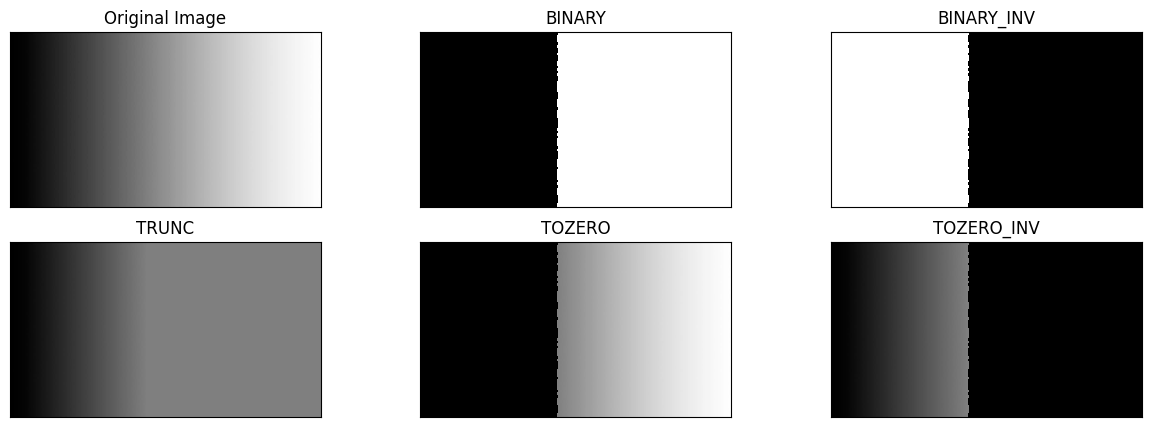

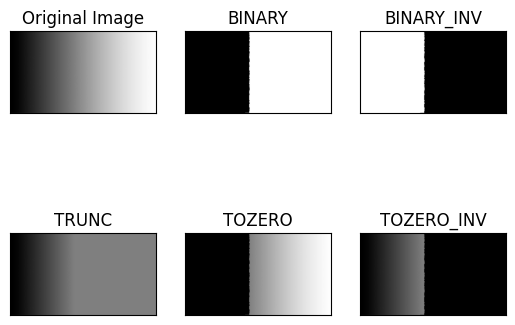

In [3]:
# number 3
# Without Using Library
filename_1 = ('/content/drive/MyDrive/Polinema/Semester 5/PVCK/Meeting 10/gradient.jpg')
img_g = cv2.imread(filename_1, 0)
thresh1 = cv2.imread(filename_1)
thresh2 = cv2.imread(filename_1)
thresh3 = cv2.imread(filename_1)
thresh4 = cv2.imread(filename_1)
thresh5 = cv2.imread(filename_1)
thresh = 127    #threeshold value that has been determined

#1. Original Image
thresh1[img_g>thresh] = 255
thresh1[img_g<=thresh] = 0

#2. Binary threshold inverse
thresh2 = 255 - thresh1
#3. Threshold Truncate
thresh3[img_g>thresh] = thresh
#4. Threshold Tozero
thresh4[img_g<=thresh] = 0
#5. Threshold Tozero Inverse
thresh5[img_g>thresh] = 0

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img_g, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

# Using Library
img_g = cv2.imread(filename_1)
ret,thresh1 = cv2.threshold(img_g,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img_g,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img_g,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img_g,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img_g,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img_g, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

4. Create Otsu Thresholding without using the Library. Also display the threshold value
when you use Otsu's, as shown in the following image . (use the
image lena_gs_lc2.jpg so that it really looks different between the otsu's results and
the usual global threshold)

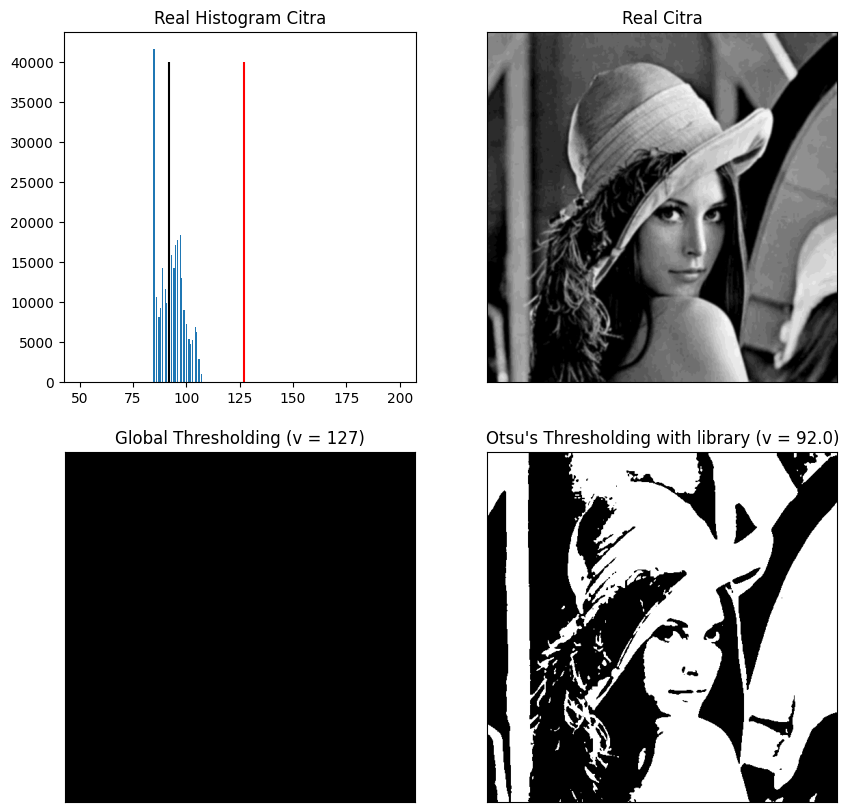

<ipython-input-4-871362721676>:46: RuntimeWarning: invalid value encountered in divide
  mb = sumb / wb
<ipython-input-4-871362721676>:47: RuntimeWarning: invalid value encountered in divide
  mf = (sumb - sumb)/wf


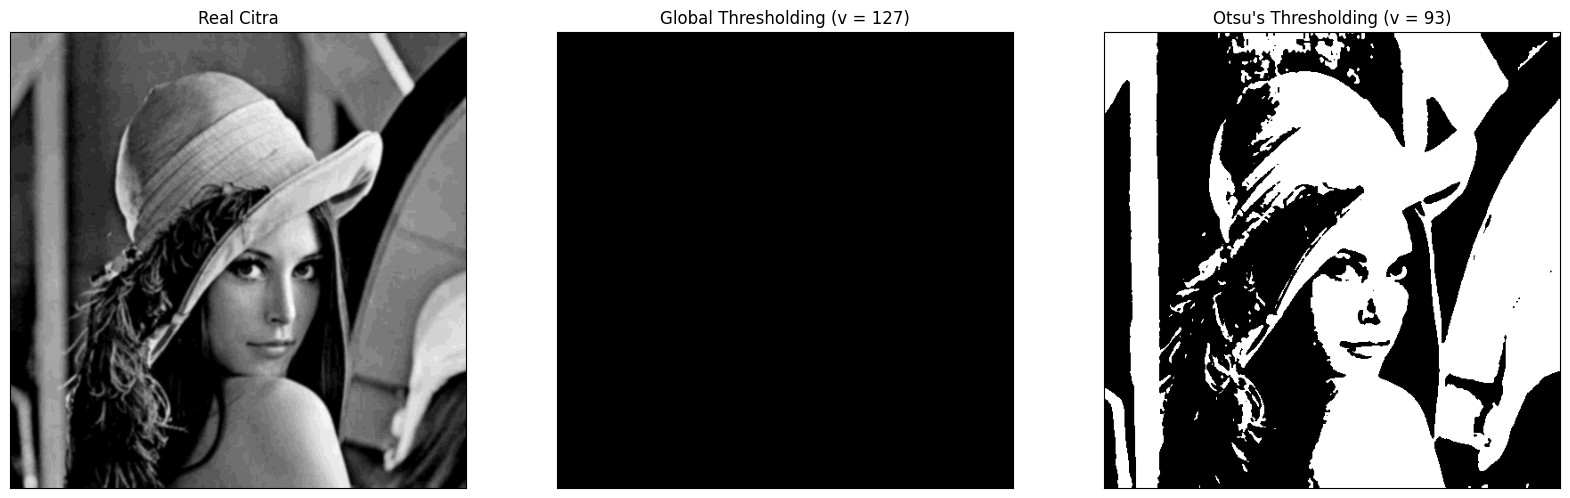

In [4]:
# Number 4
# Using library
filename_2 = ('/content/drive/MyDrive/Polinema/Semester 5/PVCK/Meeting 10/lena_gs_lc2.jpg')
img_lgs = cv2.imread(filename_2, 0)
blur = cv2.GaussianBlur(img_lgs,(5,5),0)
thresh = 127

ret,th1 = cv2.threshold(blur,thresh,255,cv2.THRESH_BINARY)
ret2,th2 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

x = ("Otsu's Thresholding with library (v = ")+str(ret2)+")"
titles = ['Real Citra', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])

plt.vlines(ret,0,40000,colors='red') #The red vertical line shows the global threshold of 127
plt.vlines(ret2,0,40000,colors='black') #The black vertical line shows Otsu's threshold 92 results
plt.title('Real Histogram Citra')

for i in range(len(citra3)):
  plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

# Without Using library
img_lgs = cv2.imread(filename_2, 0)
blur = cv2.GaussianBlur(img_lgs, (5,5),0)
hist = cv2.calcHist([blur],[0],None,[256], [0,256])

hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()
bins = np.arange (256)
wb = 0
sumb = 0
varmax = 0
fn_min = np.inf
thresh = -1

for i in range(0,255):
  wb += hist[i]
  wf = (img_lgs.shape[0]*img_lgs.shape[1]) - wb
  sumb += (i*hist[i])
  mb = sumb / wb
  mf = (sumb - sumb)/wf
  betweenvar = wb * wf * (mb - mf) * (mb - mf)

  if (betweenvar>varmax):
    varmax = betweenvar
    thresh = i

x = ("Otsu's Thresholding (v = ")+str(thresh)+")"
ret, th1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)
ret, th2 = cv2.threshold (blur, thresh, 255, cv2. THRESH_BINARY)

titles = ['Real Citra', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (20,15))

for i in range(len(citra3)):
    plt. subplot(1,3,i+1),plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

5. Create a histogram from a segmented image, the histogram is only in the foreground image. Use the Lily or Leaves image provided in the images folder .

Instructions:

A. You can use cv.calcHist to display a histogram.

B. Open the folloiwng link https://opencv-tutorial.readthedocs.io/en/latest/histogram/histogram.html

C. From the link, note that cv.calcHist has one of the parameters, namely mask. If set to None, the entire image histogram will be counted. If we specify a mask, only the part of the image masked in white will be calculated for the histogram (from the example below it is called Image Segment).

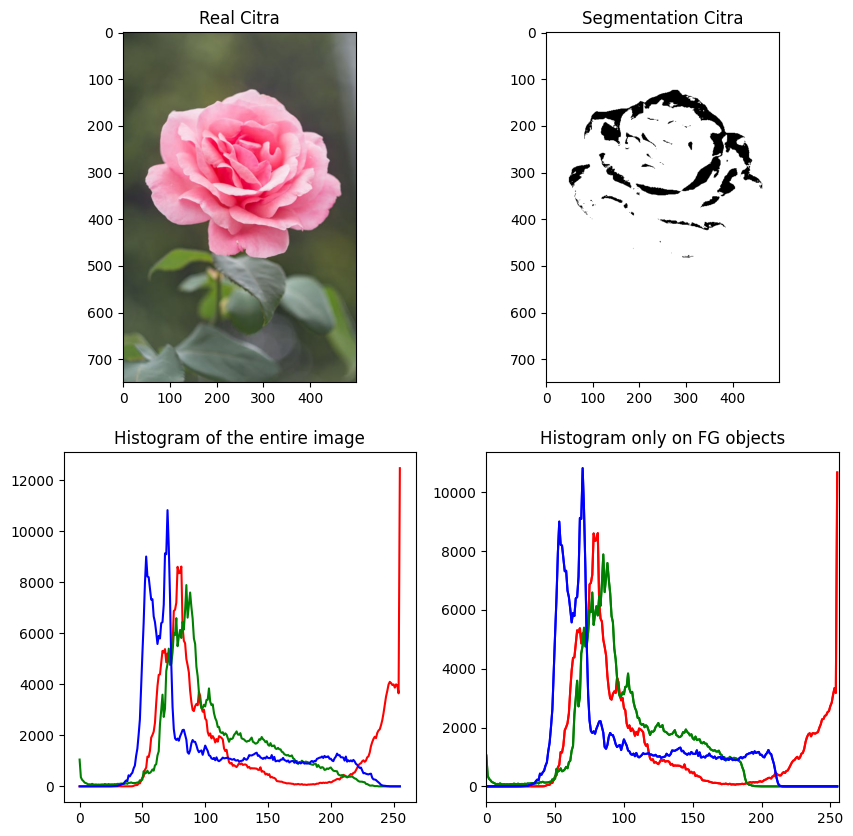

In [5]:
# number 5
filename_3 = ('/content/drive/MyDrive/Polinema/Semester 5/PVCK/Meeting 10/rose_pink.png')
img_l = cv2.imread(filename_3)
img_rgb = cv2.cvtColor(img_l,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Real Citra')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Segmentation Citra')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram of the entire image')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram of the entire image')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram only on FG objects')
    plt.xlim([0,256])

plt.show()

6. Perform color segmentation on the image "peppers.jpg", display only yellow
colors . (Hint: you can use K-Means to display only certain colors)

(<Axes: >, <matplotlib.image.AxesImage at 0x7c736ce21d80>)

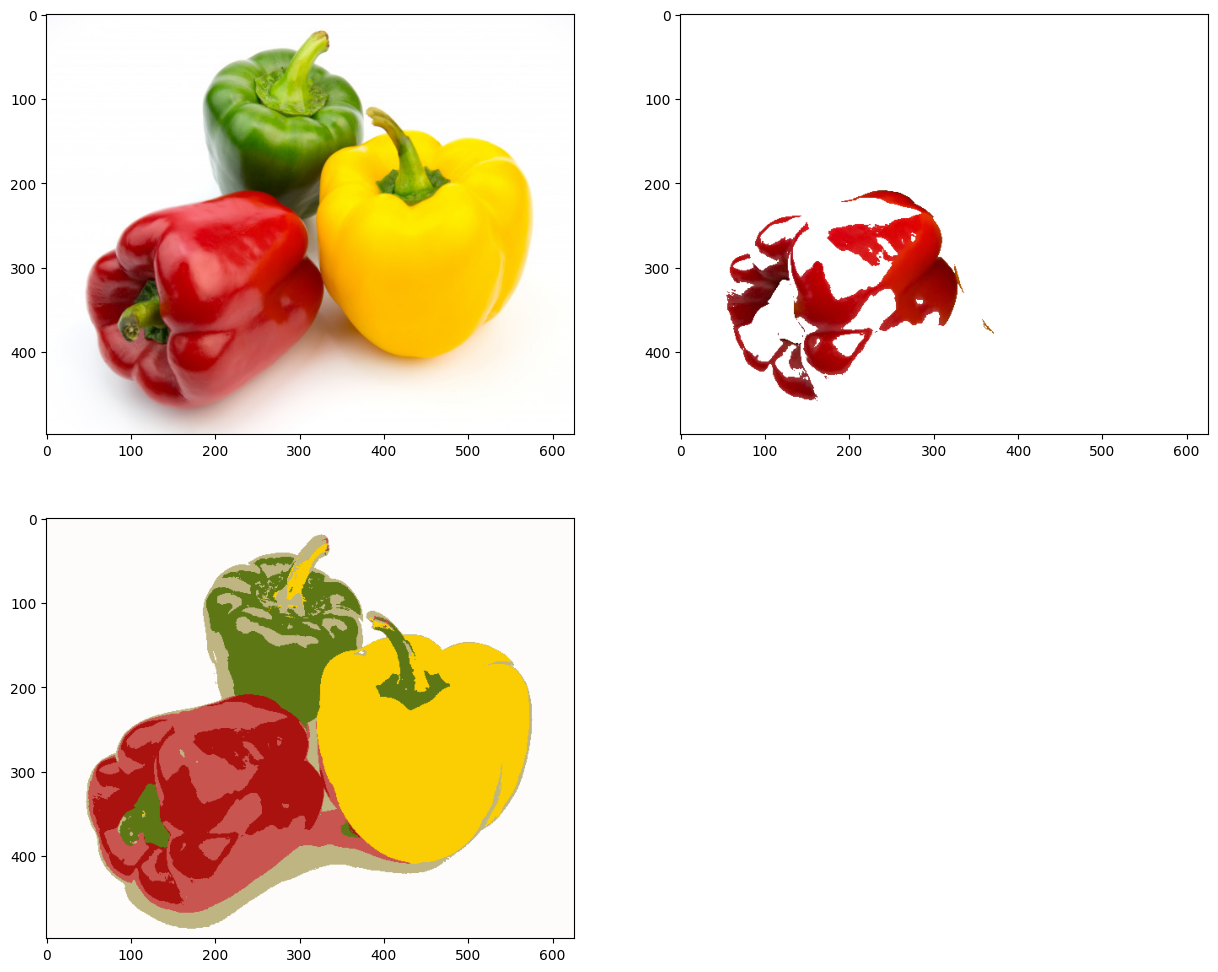

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

filename = ('/content/drive/MyDrive/Polinema/Semester 5/PVCK/Meeting 10/peppers.jpg')

img = cv2.imread(filename)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


pixel_values = img.reshape((-1, 3))

pixel_values = np.float32(pixel_values)

#The condition for stopping iteration from KMeans is if the centroid has not shifted too much position between the current iteration and the previous iteration (converges).
#Because the amount of data is large,
#we will stop the iteration when the number of iterations = 100 or epsilon (the difference between the current centroid position and the centroid position in the previous iteration) <0.2
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

#If you look at the original image, there are 3 main colors (green, blue, and white/orange). For this experiment we will use 3 clusters for this image
k = 6
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

#convert centroid points into integers
centers = np.uint8(centers)

#flattening array labels
labels = labels.flatten()

#conversion of the original pixel color to the color of each centroid
segmented_image = centers[labels.flatten()]
# reshape to the original image
segmented_image = segmented_image.reshape(img.shape)

masked_image = np.copy(img)
masked_image0= masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)


plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(masked_image0)
plt.subplot(2,2,3),plt.imshow(segmented_image)

7. Open the crossword.jpg file. With the knowledge of thresholding that you have
learned. Perform binary thresholding with the best results in your opinion. Copy the code and image results in this module.

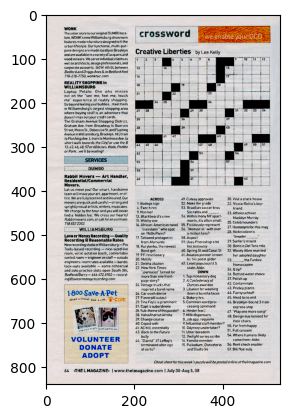

In [7]:
img_c = cv2.imread('/content/drive/MyDrive/Polinema/Semester 5/PVCK/Meeting 10/crossword.jpg')
img_rgb3 = cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB)

ret, thresh = cv2.threshold(img_rgb3, 125, 255, cv2.THRESH_TOZERO)

plt.imshow(thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()